In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl

In [22]:
df_sale = pd.read_csv('sale_of_tour_packages.csv', sep=";")
df_travels = pd.read_csv('travels.csv', sep=";")
df_agents = pd.read_csv('travel_agents.csv', sep=";")

In [100]:
df_sale.head()
sns.set(rc={'figure.figsize':(150.5,20.5)})

In [24]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID операции                   5001 non-null   object
 1   Дата                          5001 non-null   object
 2   ID тура                       5001 non-null   object
 3   ID туроператора               5001 non-null   object
 4   Количество проданных путёвок  5001 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 195.5+ KB


In [25]:
df_agents.head()

,ID туроператора,Название,Адрес
0,T100,Путешественник,"Айвазовского ул, 53"
1,T101,Вокруг света,"Серафимы Дерябиной ул, 24"
2,T102,Традиции,"Токарей ул, 52"
3,T103,Иллюзия,"Космонавтов пр-кт, 104"
4,T104,Даль,"Ясная ул, 2"


In [26]:
df_travels.head()

,ID тура,Город,"Продолжительность, дней","Стоимость, на 1 чел"
0,R1101,Москва,7,19700
1,R1102,Апатиты,7,17400
2,R1103,Великий Устюг,4,22700
3,R1104,Вологда,10,11400
4,R1105,Каргополь,5,14700


In [28]:
df_travels

,ID тура,Город,"Продолжительность, дней","Стоимость, на 1 чел"
0,R1101,Москва,7,19700
1,R1102,Апатиты,7,17400
2,R1103,Великий Устюг,4,22700
3,R1104,Вологда,10,11400
4,R1105,Каргополь,5,14700
5,R1106,Котлас,10,7000
6,R1107,Коряжма,7,6800
7,R1108,Мурманск,5,29200
8,R1109,Няндома,4,8100
9,R1110,Онега,10,17700


In [29]:
df_sale['Количество проданных путёвок'].sum()

55248

In [30]:
horizon_travels = pd.merge(df_sale, df_agents)

In [33]:
horizon_travels_with_price = pd.merge(horizon_travels, df_travels)

In [37]:
horizon_travels_with_price = horizon_travels_with_price[horizon_travels_with_price['Название'] == 'Горизонт']

In [38]:
horizon_travels_with_price

,ID операции,Дата,ID тура,ID туроператора,Количество проданных путёвок,Название,Адрес,Город,"Продолжительность, дней","Стоимость, на 1 чел"
86,OP1490,27.01.2022,R1120,T107,10,Горизонт,"Черепанова ул, 121",Кемь,5,17300
87,OP2466,14.02.2022,R1120,T107,7,Горизонт,"Черепанова ул, 121",Кемь,5,17300
88,OP3410,03.03.2022,R1120,T107,13,Горизонт,"Черепанова ул, 121",Кемь,5,17300
89,OP4222,18.03.2022,R1120,T107,10,Горизонт,"Черепанова ул, 121",Кемь,5,17300
243,OP1120,20.01.2022,R1103,T107,6,Горизонт,"Черепанова ул, 121",Великий Устюг,4,22700
...,...,...,...,...,...,...,...,...,...,...
4922,OP2220,10.02.2022,R1116,T107,7,Горизонт,"Черепанова ул, 121",Вельск,6,27600
4923,OP2306,11.02.2022,R1116,T107,11,Горизонт,"Черепанова ул, 121",Вельск,6,27600
4924,OP2331,12.02.2022,R1116,T107,13,Горизонт,"Черепанова ул, 121",Вельск,6,27600
4925,OP4108,16.03.2022,R1116,T107,5,Горизонт,"Черепанова ул, 121",Вельск,6,27600


In [74]:
horizon_cities = horizon_travels_with_price.groupby(['Город', 'Стоимость, на 1 чел'], as_index = False)[['Количество проданных путёвок']].sum()

In [75]:
horizon_cities

,Город,"Стоимость, на 1 чел",Количество проданных путёвок
0,Апатиты,17400,60
1,Архангельск,15000,55
2,Беломорск,25300,197
3,Великие Луки,24100,85
4,Великий Устюг,22700,123
5,Вельск,27600,59
6,Вологда,11400,81
7,Иваново,17900,91
8,Каргополь,14700,99
9,Кемь,17300,40


In [76]:
horizon_cities

,Город,"Стоимость, на 1 чел",Количество проданных путёвок
0,Апатиты,17400,60
1,Архангельск,15000,55
2,Беломорск,25300,197
3,Великие Луки,24100,85
4,Великий Устюг,22700,123
5,Вельск,27600,59
6,Вологда,11400,81
7,Иваново,17900,91
8,Каргополь,14700,99
9,Кемь,17300,40


In [78]:
total_cost = horizon_cities['Стоимость, на 1 чел'] * horizon_cities['Количество проданных путёвок']

In [79]:
total_cost

0     1044000
1      825000
2     4984100
3     2048500
4     2792100
5     1628400
6      923400
7     1628900
8     1455300
9      692000
10    2141700
11     265200
12    2029100
13     899600
14     378000
15     460800
16     886500
17    1138800
18    1093500
19    2318700
20    3016000
21    1526400
22     457500
23    2880000
24     268400
25     644400
26     319200
27     578100
28     330600
29     750400
30    1202700
31    1655400
dtype: int64

In [80]:
horizon_cities['total_price'] = total_cost

In [81]:
horizon_cities

,Город,"Стоимость, на 1 чел",Количество проданных путёвок,total_price
0,Апатиты,17400,60,1044000
1,Архангельск,15000,55,825000
2,Беломорск,25300,197,4984100
3,Великие Луки,24100,85,2048500
4,Великий Устюг,22700,123,2792100
5,Вельск,27600,59,1628400
6,Вологда,11400,81,923400
7,Иваново,17900,91,1628900
8,Каргополь,14700,99,1455300
9,Кемь,17300,40,692000


In [82]:
horizon_labels = horizon_cities['Город']
horizon_labels = np.sort(horizon_labels)
horizon_data = horizon_cities['total_price']

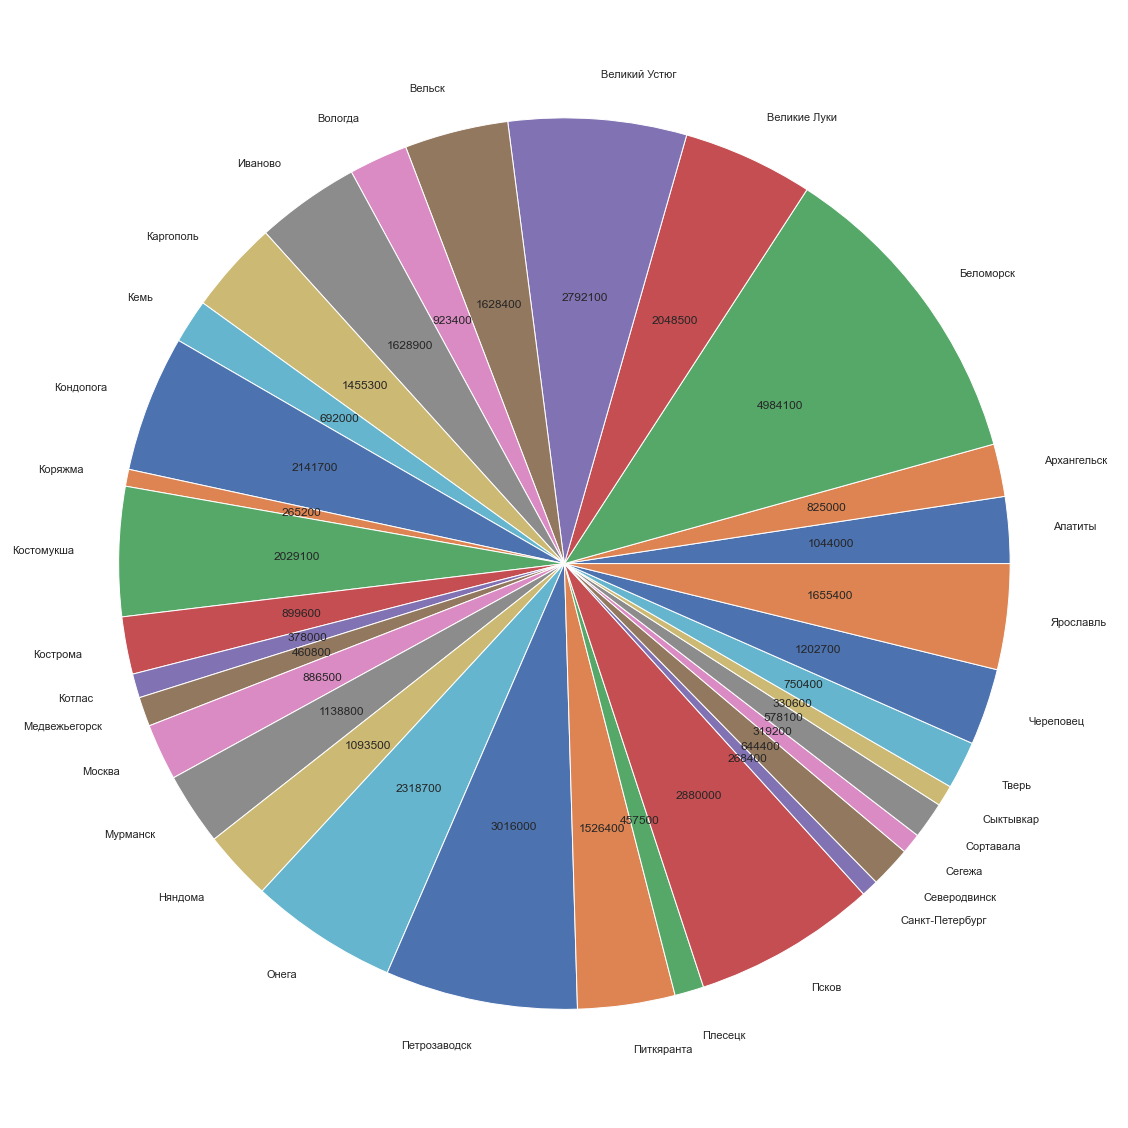

In [98]:
plt.pie(horizon_data, labels = horizon_labels, autopct= lambda x: '{:.0f}'.format(x*horizon_data.sum()/100))
plt.savefig("horizon.png")

In [87]:
mechta_t1 = pd.merge(horizon_travels, df_travels)
mechta_temp = mechta_t1[mechta_t1['Название'] == 'Мечта']

In [88]:
mechta_temp

,ID операции,Дата,ID тура,ID туроператора,Количество проданных путёвок,Название,Адрес,Город,"Продолжительность, дней","Стоимость, на 1 чел"
107,OP0581,11.01.2022,R1120,T111,8,Мечта,"Ровный пр-кт, 11",Кемь,5,17300
108,OP1175,21.01.2022,R1120,T111,16,Мечта,"Ровный пр-кт, 11",Кемь,5,17300
109,OP1302,24.01.2022,R1120,T111,3,Мечта,"Ровный пр-кт, 11",Кемь,5,17300
110,OP1603,30.01.2022,R1120,T111,8,Мечта,"Ровный пр-кт, 11",Кемь,5,17300
111,OP3785,10.03.2022,R1120,T111,7,Мечта,"Ровный пр-кт, 11",Кемь,5,17300
...,...,...,...,...,...,...,...,...,...,...
4945,OP1286,24.01.2022,R1116,T111,14,Мечта,"Ровный пр-кт, 11",Вельск,6,27600
4946,OP2083,08.02.2022,R1116,T111,14,Мечта,"Ровный пр-кт, 11",Вельск,6,27600
4947,OP2286,11.02.2022,R1116,T111,19,Мечта,"Ровный пр-кт, 11",Вельск,6,27600
4948,OP2609,17.02.2022,R1116,T111,2,Мечта,"Ровный пр-кт, 11",Вельск,6,27600


In [89]:
mechta_each_day = mechta_temp.groupby(['Дата'], as_index=False)[['Количество проданных путёвок']].sum()

In [90]:
mechta_each_day

,Дата,Количество проданных путёвок
0,01.01.2022,15
1,01.02.2022,6
2,02.01.2022,60
3,02.02.2022,18
4,02.03.2022,25
...,...,...
78,29.01.2022,9
79,29.03.2022,29
80,30.01.2022,32
81,30.03.2022,22


In [109]:
mechta_each_day['Дата'] = pd.to_datetime(mechta_each_day['Дата'])
mechta_each_day['Дата'] = mechta_each_day['Дата'].dt.date
mechta_each_day = mechta_each_day.sort_values(by="Дата")
mechta_each_day

,Дата,Количество проданных путёвок
0,2022-01-01,15
1,2022-01-02,6
33,2022-01-13,28
36,2022-01-14,12
39,2022-01-15,33
...,...,...
28,2022-11-01,66
29,2022-11-02,64
30,2022-11-03,47
31,2022-12-01,46


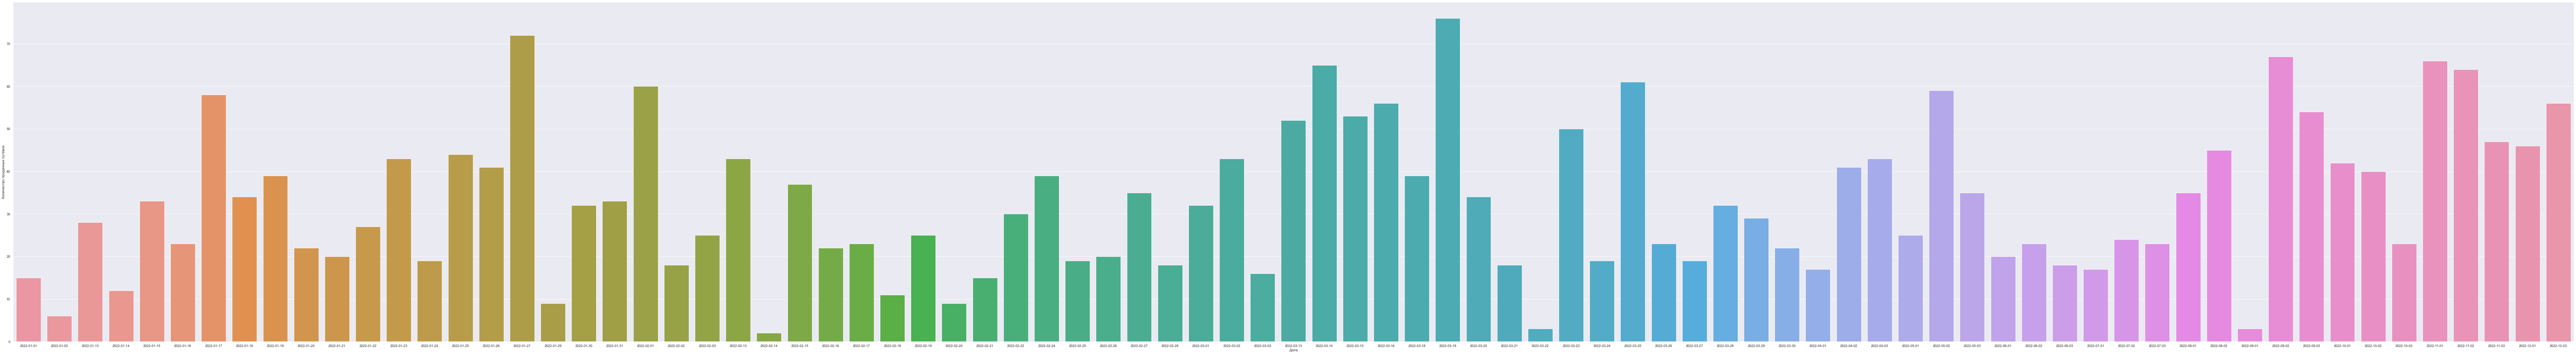

In [110]:
sns.barplot(data=mechta_each_day, x="Дата", y="Количество проданных путёвок")
plt.savefig("mechta.png")